In [ ]:
## Gathering text for Google searches: Right now news only ##
### Need to make this a function ###

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Broadway_Original = pd.read_csv('broadway(corgi)1.csv') #Read in CORGI data set
Google_Parameters= Broadway_Original[['Name','Year','Month','Day','Type']] #Reduce data set to variables to input into GT

#Filter to shows after 2010 only
Google_Parameters=Google_Parameters.loc[Google_Parameters['Year']>2010] 
Google_Parameters=Google_Parameters.loc[Google_Parameters['Type']=='Musical'] 

#Provides a list of shows in form needed for function 
show_list=list(Google_Parameters.Name.unique()) 
show_list.sort() #in alphabetical order
print(len(show_list))

113


In [2]:
from textblob import TextBlob #Allows us to analyze subjectivity
from bs4 import BeautifulSoup
import requests

#search show
#subjectivity
#sentiment
#self.show=search show

class Analysis: #don't really understand the class portion of this
    def __init__(self, show):
        """
        This function initializes all of the objects used for gathering Google headlines and 
        sentiment analysis. It takes the parameters self and show. Self corresponds to the Google page of interest, and show is the search show whose headlines are going to be analyzed. 
        """
        self.show= show
                     #0=what want search show to be nws = news can filter by images ect
        self.sentiment=0
        self.url='https://www.google.com/search?q={0}&source=lnms&tbm=nws&as_qdr=y'.format(self.show)
        #print(self.url)
    def run(self):
        """
        The run function gathers the html document and the headlines for the url  for the search show identified and uses beautiful soup to 
        print the full html. It takes self as a parameter.
        """
        response=requests.get(self.url) #sends request to specific url and gets raw html
        print(response.text) #if you just say response, gives 200 
        soup=BeautifulSoup(response.text, 'html.parser')
        headline_results=soup.find_all('div',class_='st')
        for h in headline_results:
            blob = TextBlob(h.get_text()) #grabs the text in each headline
            self.sentiment += blob.sentiment.polarity / len(headline_results) #polarity between (0-1) of the 
        
a=Analysis('City of Stars')
a.run()
#print(a.show, 'Sentiment:',a.sentiment)

# Advanced search url
#https://www.google.com/search?hl=en&as_q=Hamilton+musical&as_epq=&as_oq=&as_eq=&as_nlo=&as_nhi=&lr=&cr=&as_qdr=y&as_sitesearch=&as_occt=any&safe=images&as_filetype=&as_rights=

# Regular search url
#https://www.google.com/search?q=Hamilton+musical&lr=&hl=en&tbas=0&source=lnt&sa=X&ved=0ahUKEwiRkvDarf3gAhVyjoMKHWDADGwQpwUIIw&biw=622&bih=721

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=City+of+Stars&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=3PaKXI-jG471-wS3rLzwCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=City+of+Stars&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=3PaKXI-jG471-wS3rLzwCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>City of Stars - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

In [3]:
#Making a dataframe with the sentiment scores of all of the shows
show_sent=[]
for i in show_list:
        a=Analysis(i)
        a.run()
        show_sent.append(a.sentiment)
        
show_sentimentality=pd.DataFrame({'Name':show_list ,'Sentimentality':show_sent})     
show_sentimentality
#https://www.google.com/search?biw=1260&bih=661&tbm=nws&ei=SxKJXJeMB-nNjwS-nIAg&q=the+king+and+i+2015+%28musical%29&oq=the+king+and+i+2015+%28musical%29&gs_l=psy-ab.3...3140.8942.0.9506.25.20.5.0.0.0.88.1155.20.20.0....0...1c.1.64.psy-ab..0.6.352...0j33i299k1.0.j9AH2UCvlTY
#    https://www.google.com/search?q=the+king+and+i+2015+(musical)&source=lnms&sa=X&ved=0ahUKEwij9PHfqP_gAhVNq4MKHToeBWEQ_AUICSgA&biw=1260&bih=661&dpr=2#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Christmas+Story&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4vaKXKHbCsPU-gS-m6boDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Christmas+Story&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4vaKXKHbCsPU-gS-m6boDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Christmas Story - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Gentleman%27S+Guide+To+Love+And+Murder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4vaKXNqnIc2e-gSfx6DoCg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Gentleman%27S+Guide+To+Love+And+Murder&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4vaKXNqnIc2e-gSfx6DoCg">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Gentleman'S Guide To Love And Murder - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolut

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Little+Night+Music&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4vaKXKetN8v7-gTQuZGoAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Little+Night+Music&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4vaKXKetN8v7-gTQuZGoAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Little Night Music - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=A+Night+With+Janis+Joplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4_aKXLuBEZf_-gTz_omYCg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=A+Night+With+Janis+Joplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4_aKXLuBEZf_-gTz_omYCg">here</a> if you are not redirected within a few seconds.</div></noscript><title>A Night With Janis Joplin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{heigh

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=After+Midnight&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4_aKXLvpJNj4-wSnuaawAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=After+Midnight&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=4_aKXLvpJNj4-wSnuaawAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>After Midnight - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Aladdin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5PaKXOmUAZK9-gTUnKnoBg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Aladdin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5PaKXOmUAZK9-gTUnKnoBg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Aladdin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{floa

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Allegiance&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5PaKXODzFc2U-gSptLzIAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Allegiance&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5PaKXODzFc2U-gSptLzIAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Allegiance - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Amazing+Grace&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5PaKXLOWLcTT-wSHxIrQAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Amazing+Grace&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5PaKXLOWLcTT-wSHxIrQAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Amazing Grace - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=American+Idiot&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5faKXNuaDsHC-gSV1IqYAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=American+Idiot&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5faKXNuaDsHC-gSV1IqYAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>American Idiot - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=American+Psycho&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5faKXI64JInr-gSs1o2ADg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=American+Psycho&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5faKXI64JInr-gSs1o2ADg">here</a> if you are not redirected within a few seconds.</div></noscript><title>American Psycho - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;verti

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=An+American+In+Paris&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5faKXOOfPNSX-gTjirP4Aw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=An+American+In+Paris&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5faKXOOfPNSX-gTjirP4Aw">here</a> if you are not redirected within a few seconds.</div></noscript><title>An American In Paris - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Annie+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5vaKXPCNFtfK-gTGw6mIBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Annie+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5vaKXPCNFtfK-gTGw6mIBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Annie '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Anything+Goes+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5vaKXImhLcr2-gTO2a64Bw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Anything+Goes+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5vaKXImhLcr2-gTO2a64Bw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Anything Goes '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Baby+It%27S+You!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5_aKXLrDCMyv-gSF15TIDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Baby+It%27S+You!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5_aKXLrDCMyv-gSF15TIDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Baby It'S You! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vert

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Beautiful&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5_aKXLCfH8n9-gS39pbwCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Beautiful&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5_aKXLCfH8n9-gS39pbwCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Beautiful - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gba

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Big+Fish&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5_aKXPy6N8XF-gT7-ZuADw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Big+Fish&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=5_aKXPy6N8XF-gT7-ZuADw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Big Fish - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Billy+Elliot:+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6PaKXI2DLdW_0PEPvIyWuA0" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Billy+Elliot:+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6PaKXI2DLdW_0PEPvIyWuA0">here</a> if you are not redirected within a few seconds.</div></noscript><title>Billy Elliot: The Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{hei

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bloody+Bloody+Andrew+Jackson&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6faKXKPaBdXv9APcvK6gAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bloody+Bloody+Andrew+Jackson&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6faKXKPaBdXv9APcvK6gAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bloody Bloody Andrew Jackson - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bonnie+And+Clyde&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6faKXL_qG6uv0PEPqs-l2A0" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bonnie+And+Clyde&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6faKXL_qG6uv0PEPqs-l2A0">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bonnie And Clyde - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bright+Star&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6faKXMK0M9XR9APsoYNA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bright+Star&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6faKXMK0M9XR9APsoYNA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bright Star - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#g

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bring+It+On+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6vaKXMfAFaes0PEPz9aosAY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bring+It+On+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6vaKXMfAFaes0PEPz9aosAY">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bring It On The Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Bullets+Over+Broadway&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6vaKXKjcNZuT0PEP_uKqgAM" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Bullets+Over+Broadway&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6vaKXKjcNZuT0PEP_uKqgAM">here</a> if you are not redirected within a few seconds.</div></noscript><title>Bullets Over Broadway - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;mar

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cabaret+%2714&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6_aKXP-OD5Xr9AOimoGQDw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cabaret+%2714&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6_aKXP-OD5Xr9AOimoGQDw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cabaret '14 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-alig

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Catch+Me+If+You+Can&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6_aKXLWkKNvA0PEPzqK5uA8" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Catch+Me+If+You+Can&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=6_aKXLWkKNvA0PEPzqK5uA8">here</a> if you are not redirected within a few seconds.</div></noscript><title>Catch Me If You Can - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-ri

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cats+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7PaKXL7ND9LB0PEP3d-OkAY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cats+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7PaKXL7ND9LB0PEP3d-OkAY">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cats 2016 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#g

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Chaplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7PaKXNvZKtKu0PEPto2JwAU" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Chaplin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7PaKXNvZKtKu0PEPto2JwAU">here</a> if you are not redirected within a few seconds.</div></noscript><title>Chaplin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Chicago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7faKXNfgA8K80PEP1NuLuAM" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Chicago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7faKXNfgA8K80PEP1NuLuAM">here</a> if you are not redirected within a few seconds.</div></noscript><title>Chicago - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Cinderella&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7faKXO7ALtPl9AP2mbyoDQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Cinderella&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7faKXO7ALtPl9AP2mbyoDQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Cinderella - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Dames+At+Sea&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7vaKXM6xCKPc9AO_5be4DQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Dames+At+Sea&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7vaKXM6xCKPc9AO_5be4DQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Dames At Sea - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Disaster!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7vaKXJzNIZfI0PEPh7e6yAU" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Disaster!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7vaKXJzNIZfI0PEPh7e6yAU">here</a> if you are not redirected within a few seconds.</div></noscript><title>Disaster! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#g

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Doctor+Zhivago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7vaKXNaPN8-Q0PEPjrmy6AI" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Doctor+Zhivago&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7vaKXNaPN8-Q0PEPjrmy6AI">here</a> if you are not redirected within a few seconds.</div></noscript><title>Doctor Zhivago - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertic

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Elf&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7_aKXJLFDvfJ0PEPmv23-Ao" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Elf&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7_aKXJLFDvfJ0PEPmv23-Ao">here</a> if you are not redirected within a few seconds.</div></noscript><title>Elf - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Elf+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7_aKXOS0JIm50PEPteiy6AU" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Elf+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=7_aKXOS0JIm50PEPteiy6AU">here</a> if you are not redirected within a few seconds.</div></noscript><title>Elf '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gba

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Evita&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8PaKXNk-ucrQ8Q_b3I6wCA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Evita&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8PaKXNk-ucrQ8Q_b3I6wCA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Evita - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fela!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8faKXMm-Fs6-0PEPpPaSgAE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fela!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8faKXMm-Fs6-0PEPpPaSgAE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fela! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:le

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fela!+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8faKXJ7CK_HY9AOYjaSQAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fela!+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8faKXJ7CK_HY9AOYjaSQAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fela! '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fiddler+On+The+Roof+2015&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8vaKXPKeA_q-0PEPmYSliAE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fiddler+On+The+Roof+2015&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8vaKXPKeA_q-0PEPmYSliAE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fiddler On The Roof 2015 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Finding+Neverland&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8vaKXO-mGIW80PEPgNGYkAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Finding+Neverland&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8vaKXO-mGIW80PEPgNGYkAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Finding Neverland - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=First+Date&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8vaKXOa9L9XA7gKj2IPYBA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=First+Date&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8vaKXOa9L9XA7gKj2IPYBA">here</a> if you are not redirected within a few seconds.</div></noscript><title>First Date - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Follies+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8_aKXKm8CNux0PEP7P6UwAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Follies+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8_aKXKm8CNux0PEP7P6UwAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Follies '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Fun+Home&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8_aKXKuGHZuN0PEPxrud-Ag" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Fun+Home&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8_aKXKuGHZuN0PEPxrud-Ag">here</a> if you are not redirected within a few seconds.</div></noscript><title>Fun Home - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Ghost&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8_aKXJaGNJi90PEP2ZWakAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Ghost&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=8_aKXJaGNJi90PEP2ZWakAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Ghost - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:le

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Gigi&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9PaKXIGVDI3F0PEPxbm4iAI" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Gigi&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9PaKXIGVDI3F0PEPxbm4iAI">here</a> if you are not redirected within a few seconds.</div></noscript><title>Gigi - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Godspell&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9PaKXOD_IYOS0PEPw-aU8AI" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Godspell&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9PaKXOD_IYOS0PEPw-aU8AI">here</a> if you are not redirected within a few seconds.</div></noscript><title>Godspell - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hair+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9PaKXPLANqDE0PEP5_K7uAY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hair+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9PaKXPLANqDE0PEP5_K7uAY">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hair '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hamilton&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9faKXIKIE4-Q0PEP-OCRuAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hamilton&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9faKXIKIE4-Q0PEP-OCRuAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hamilton - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hands+On+A+Hardbody&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9faKXLG7KdPv9AO0-JygCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hands+On+A+Hardbody&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9faKXLG7KdPv9AO0-JygCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hands On A Hardbody - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-righ

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Hedwig+And+The+Angry+Inch&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9vaKXN3fA6260PEPwsqjmAY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Hedwig+And+The+Angry+Inch&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9vaKXN3fA6260PEPwsqjmAY">here</a> if you are not redirected within a few seconds.</div></noscript><title>Hedwig And The Angry Inch - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{hei

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Holler+If+Ya+Hear+Me&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9vaKXP2SGaHL0PEP95WRoA4" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Holler+If+Ya+Hear+Me&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9vaKXP2SGaHL0PEP95WRoA4">here</a> if you are not redirected within a few seconds.</div></noscript><title>Holler If Ya Hear Me - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Honeymoon+In+Vegas&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9vaKXMzKLda80PEP05aNqA0" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Honeymoon+In+Vegas&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9vaKXMzKLda80PEP05aNqA0">here</a> if you are not redirected within a few seconds.</div></noscript><title>Honeymoon In Vegas - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=How+To+Succeed+In+Business+Without+Really+Trying+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9_aKXP-gBvaR0PEP3pOR2AQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=How+To+Succeed+In+Business+Without+Really+Trying+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9_aKXP-gBvaR0PEP3pOR2AQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>How To Succeed In Business Without Really Trying '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=If/Then&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9_aKXKLHHaes0PEPz9aosAY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=If/Then&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9_aKXKLHHaes0PEPz9aosAY">here</a> if you are not redirected within a few seconds.</div></noscript><title>If/Then - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=In+The+Heights&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9_aKXJX1Me2U0PEP4P2jqAU" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=In+The+Heights&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=9_aKXJX1Me2U0PEP4P2jqAU">here</a> if you are not redirected within a few seconds.</div></noscript><title>In The Heights - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertic

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=It+Shoulda+Been+You&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-PaKXJKZDaSQ0PEP08KR-Ac" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=It+Shoulda+Been+You&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-PaKXJKZDaSQ0PEP08KR-Ac">here</a> if you are not redirected within a few seconds.</div></noscript><title>It Shoulda Been You - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-ri

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Jekyll&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-PaKXNvCI9-50PEP2O-PsAo" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Jekyll&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-PaKXNvCI9-50PEP2O-PsAo">here</a> if you are not redirected within a few seconds.</div></noscript><title>Jekyll - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Jersey+Boys&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-PaKXL-iOLG70PEPp9Cs0AE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Jersey+Boys&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-PaKXL-iOLG70PEPp9Cs0AE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Jersey Boys - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Jesus+Christ+Superstar+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-faKXK3jEp_M0PEPhe-08AQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Jesus+Christ+Superstar+%2712&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-faKXK3jEp_M0PEPhe-08AQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Jesus Christ Superstar '12 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Kinky+Boots&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-faKXMDHLvfP0PEPie-O-A0" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Kinky+Boots&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-faKXMDHLvfP0PEPie-O-A0">here</a> if you are not redirected within a few seconds.</div></noscript><title>Kinky Boots - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=La+Cage+Aux+Folles+%2710&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-vaKXI7VBoiT0PEPpOGo-Aw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=La+Cage+Aux+Folles+%2710&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-vaKXI7VBoiT0PEPpOGo-Aw">here</a> if you are not redirected within a few seconds.</div></noscript><title>La Cage Aux Folles '10 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:2

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Leap+Of+Faith&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-vaKXJPuHMWt0PEP7eu9yAs" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Leap+Of+Faith&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-vaKXJPuHMWt0PEP7eu9yAs">here</a> if you are not redirected within a few seconds.</div></noscript><title>Leap Of Faith - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Les+Misrables+%2714&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-_aKXLfKBZXs9APt0oz4Cg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Les+Misrables+%2714&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-_aKXLfKBZXs9APt0oz4Cg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Les Misrables '14 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Lysistrata+Jones&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-_aKXIP-Go2w0PEPqZysaA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Lysistrata+Jones&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-_aKXIP-Go2w0PEPqZysaA">here</a> if you are not redirected within a few seconds.</div></noscript><title>Lysistrata Jones - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;ve

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Mamma+Mia!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-_aKXLSbLaOM0PEP9d6smAE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Mamma+Mia!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=-_aKXLSbLaOM0PEP9d6smAE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Mamma Mia! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Mary+Poppins&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_PaKXIS0C_GV0PEP04GfyAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Mary+Poppins&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_PaKXIS0C_GV0PEP04GfyAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>Mary Poppins - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-ali

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Matilda&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_PaKXMvpIbe_0PEPmPGxuAE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Matilda&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_PaKXMvpIbe_0PEPmPGxuAE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Matilda - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Memphis&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_faKXNnHCoy70PEP5Ka3oA4" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Memphis&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_faKXNnHCoy70PEP5Ka3oA4">here</a> if you are not redirected within a few seconds.</div></noscript><title>Memphis - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Million+Dollar+Quartet&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_faKXJvqIf270PEP_MOi4AE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Million+Dollar+Quartet&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_faKXJvqIf270PEP_MOi4AE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Million Dollar Quartet - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Motown+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_faKXJ27N6CQ0PEP69yj4AY" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Motown+The+Musical&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_faKXJ27N6CQ0PEP69yj4AY">here</a> if you are not redirected within a few seconds.</div></noscript><title>Motown The Musical - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Motown+The+Musical+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_vaKXJjeEP7E0PEP1IGjwAM" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Motown+The+Musical+2016&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_vaKXJjeEP7E0PEP1IGjwAM">here</a> if you are not redirected within a few seconds.</div></noscript><title>Motown The Musical 2016 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Newsies&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_vaKXITnJ82S0PEPh46MsAs" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Newsies&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_vaKXITnJ82S0PEPh46MsAs">here</a> if you are not redirected within a few seconds.</div></noscript><title>Newsies - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{fl

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Next+To+Normal&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_vaKXMCQOuW70PEPsrGIqAE" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Next+To+Normal&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=_vaKXMCQOuW70PEPsrGIqAE">here</a> if you are not redirected within a few seconds.</div></noscript><title>Next To Normal - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertic

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Nice+Work+If+You+Can+Get+It&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=__aKXL7mE4PN0PEPpdeSoAs" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Nice+Work+If+You+Can+Get+It&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=__aKXL7mE4PN0PEPpdeSoAs">here</a> if you are not redirected within a few seconds.</div></noscript><title>Nice Work If You Can Get It - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.g

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+A+Clear+Day+You+Can+See+Forever&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=__aKXOahK9Lw9AOKkrq4Aw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+A+Clear+Day+You+Can+See+Forever&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=__aKXOahK9Lw9AOKkrq4Aw">here</a> if you are not redirected within a few seconds.</div></noscript><title>On A Clear Day You Can See Forever - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+The+Town+2014&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=APeKXIybCZau0PEPs6SNKA" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+The+Town+2014&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=APeKXIybCZau0PEPs6SNKA">here</a> if you are not redirected within a few seconds.</div></noscript><title>On The Town 2014 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;ve

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+The+Twentieth+Century&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=APeKXIaYIvTo9APe84-wAQ" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+The+Twentieth+Century&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=APeKXIaYIvTo9APe84-wAQ">here</a> if you are not redirected within a few seconds.</div></noscript><title>On The Twentieth Century - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:2

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=On+Your+Feet!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AfeKXJOXDPTQ9AO6go_wAw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=On+Your+Feet!&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AfeKXJOXDPTQ9AO6go_wAw">here</a> if you are not redirected within a few seconds.</div></noscript><title>On Your Feet! - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-al

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Once&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AfeKXJ-bI9To9AO2k6PYCw" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Once&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AfeKXJ-bI9To9AO2k6PYCw">here</a> if you are not redirected within a few seconds.</div></noscript><title>Once - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Paramour&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AfeKXMzSOdTj9AOu2r_gBg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Paramour&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AfeKXMzSOdTj9AOu2r_gBg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Paramour - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{f

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Pippin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AveKXKOXGPfE0PEP4MiV4A8" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Pippin&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AveKXKOXGPfE0PEP4MiV4A8">here</a> if you are not redirected within a few seconds.</div></noscript><title>Pippin - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Porgy+And+Bess+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AveKXKyRO9SN0PEPxv2f4A8" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Porgy+And+Bess+%2711&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=AveKXKyRO9SN0PEPxv2f4A8">here</a> if you are not redirected within a few seconds.</div></noscript><title>Porgy And Bess '11 - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-r

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Priscilla+Queen+Of+The+Desert&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=A_eKXN-lEoCt0PEPl4KEgAU" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Priscilla+Queen+Of+The+Desert&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=A_eKXN-lEoCt0PEPl4KEgAU">here</a> if you are not redirected within a few seconds.</div></noscript><title>Priscilla Queen Of The Desert - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media 

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Promises,+Promises&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=A_eKXIKVK7Os0PEPy86CiAg" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Promises,+Promises&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=A_eKXIKVK7Os0PEPy86CiAg">here</a> if you are not redirected within a few seconds.</div></noscript><title>Promises, Promises - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Rain:+A+Tribute+To+The+Beatles+On+Broadway&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BPeKXLnaBOLA0PEPsNCwwAs" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Rain:+A+Tribute+To+The+Beatles+On+Broadway&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BPeKXLnaBOLA0PEPsNCwwAs">here</a> if you are not redirected within a few seconds.</div></noscript><title>Rain: A Tribute To The Beatles On Broadway - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;positi

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Rock+Of+Ages&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BPeKXKLEG7OQ0PEP0PWH-AM" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Rock+Of+Ages&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BPeKXKLEG7OQ0PEP0PWH-AM">here</a> if you are not redirected within a few seconds.</div></noscript><title>Rock Of Ages - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-ali

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Rocky&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BPeKXKWUNZCz0PEPyL6kwAs" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Rocky&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BPeKXKWUNZCz0PEPyL6kwAs">here</a> if you are not redirected within a few seconds.</div></noscript><title>Rocky - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:le

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Scandalous&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BfeKXInwDeGQ0PEPiMGO2Ao" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">Please click <a href="/search?q=Scandalous&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=BfeKXInwDeGQ0PEPiMGO2Ao">here</a> if you are not redirected within a few seconds.</div></noscript><title>Scandalous - Google Search</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=School%20Of%20Rock&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="iZs16hhJr7eotTKrSUHymAOdSt80Wfr3X2t__c_vq

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Side%20Show%202014&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="ckZuzvYTvf1mrn6-1vItMJov9NF2oBl8U4nnq97NP

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Soul%20Doctor&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="tZlZkXwU__T9cp75psoHcQG_q_hMiItd6oIDnusVpQw6M3

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Addams%20Family&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="RrZQfTIqX6qdj2_ja6Apa3d7VC-km4pjngDWL8

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Color%20Purple%202015&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="2fOMZTYitbNbdfc5VQgQJZsCMBhzpbvx

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Lion%20King&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="KMk9jzwEGMdzOp0HYxYP7a1e5vbNEsKoq1se9V9xno

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=The%20Phantom%20Of%20The%20Opera&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="Bj8FDhUcWSmYqaWMMydFwWOYBf1

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Violet&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="D1oXt7Rm59U6DtETehIGeGBHDinB4slWNmnmrsmz1zE5pTGQxtpHA

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=Wicked&amp;source=lnms&amp;tbm=nws&amp;as_qdr=y</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById('captcha');if(e){e.focus();}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<form id="captcha-form" action="index" method="post">
<script src="https://www.google.com/recaptcha/api.js" async defer></script>
<script>var submitCallback = function(response) {document.getElementById('captcha-form').submit();};</script>
<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="giD2JRneEe6cIpVF0_t9BzsoaWbTp2sb0yAAKiZuigBYKxjORr-mc

,Name,Sentimentality
0,A Christmas Story,-0.030167
1,A Gentleman'S Guide To Love And Murder,0.328750
2,A Little Night Music,-0.063535
3,A Night With Janis Joplin,0.316250
4,After Midnight,0.059028
5,Aladdin,0.121129
6,Allegiance,0.018167
7,Amazing Grace,0.201136
8,American Idiot,-0.122948
9,American Psycho,0.077131


In [15]:
#Merge show sentimentality with weeks

#Number of weeks each show was on Broadway
weeks=pd.DataFrame(Google_Parameters['Name'].value_counts())
weeks=weeks.reset_index()
weeks=weeks.rename(index=str, columns={"index": "Name1", "Name": "Weeks"})
weeks=weeks.sort_values(by=['Name1'])
weeks=weeks.reset_index()

#Merging sentimentality and weeks on Broadway 
Google_Headlines = pd.concat([weeks, show_sentimentality], axis=1)
Google_Headlines.drop(['index','Name1'],axis=1) #Clean
Google_Headlines = Google_Headlines[['Name', 'Weeks', 'Sentimentality']]

Google_Headlines


#Export to csv
pd.DataFrame.to_csv(Google_Headlines,'google_headlines.csv')

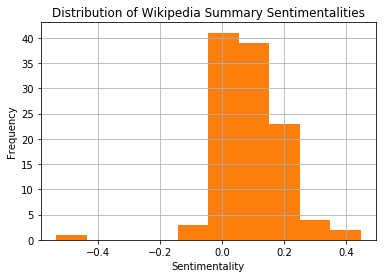

In [8]:
#Distribution of Wikipedia Sentimentalities
plot=show_sentimentality['Sentimentality'].hist()
plot.set_xlabel("Sentimentality")
plot.set_ylabel("Frequency")
plot.set_title("Distribution of Wikipedia Summary Sentimentalities")

plt.show()

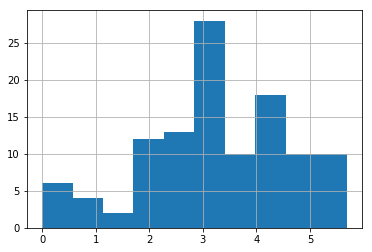

In [18]:
#log transform weeks 
Google_Headlines['Weeks'] = np.log(Google_Headlines['Weeks'])
Google_Headlines['Weeks'].hist()
plt.show()

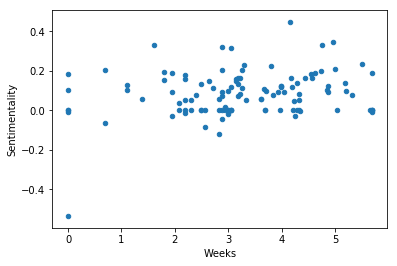

In [19]:
#Scatter plot
Google_Headlines.plot.scatter(x='Weeks', y='Sentimentality', rot=0)
plt.show()